### <div class='center'> K-Means Clustering Pada Kategorikal Data <div>

### Data klien bank:
    1 - age (numerik)
    2 - job : jenis pekerjaan (kategori: 'admin.', 'kerah biru', 'pengusaha', 'pembantu rumah tangga', 'manajemen', 'pensiunan', 'wiraswasta', 'jasa', 'pelajar' ,'teknisi','pengangguran','tidak dikenal')
    3 - marital: status perkawinan (kategori: 'bercerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'bercerai' berarti bercerai atau janda)
    4 - education (kategori: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
    5 - default: apakah kredit default? (kategori: 'tidak', 'ya', 'tidak diketahui')
    6 - housing: memiliki pinjaman perumahan? (kategori: 'tidak', 'ya', 'tidak diketahui')
    7 - loan: memiliki pinjaman pribadi? (kategori: 'tidak', 'ya', 'tidak diketahui')
    # terkait dengan kontak terakhir dari kampanye saat ini:
    8 - contact: jenis komunikasi kontak (kategori: 'seluler', 'telepon')
    9 - month: kontak terakhir bulan dalam setahun (kategori: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: hari kontak terakhir dalam seminggu (kategori: 'mon', 'tue', 'wed', 'thu', 'fri')
    11 - duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat memengaruhi target keluaran (misalnya, jika durasi=0 maka subscribed='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan pembandingan dan harus dibuang jika tujuannya adalah untuk mendapatkan model prediksi yang realistis.
    # atribut lainnya:
    12 - campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
    13 - pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak dihubungi sebelumnya)
    14 - previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
    15 - poutcome: hasil dari kampanye pemasaran sebelumnya (kategori: 'gagal', 'tidak ada', 'sukses')
    # atribut konteks sosial dan ekonomi
    16 - emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
    17 - cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
    18 - cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numerik)
    19 - euribor3m: tarif 3 bulan euribor - indikator harian (numerik)
    20 - nr.employed: jumlah karyawan - indikator triwulanan (numerik)
    21 - subscribed - apakah klien sudah berlangganan deposit? (biner: 'ya', 'tidak')

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Exploratory Data Analysis

In [3]:
df = pd.read_csv("bank-full.csv")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Continuous Feature Analysis

<Axes: xlabel='age', ylabel='Count'>

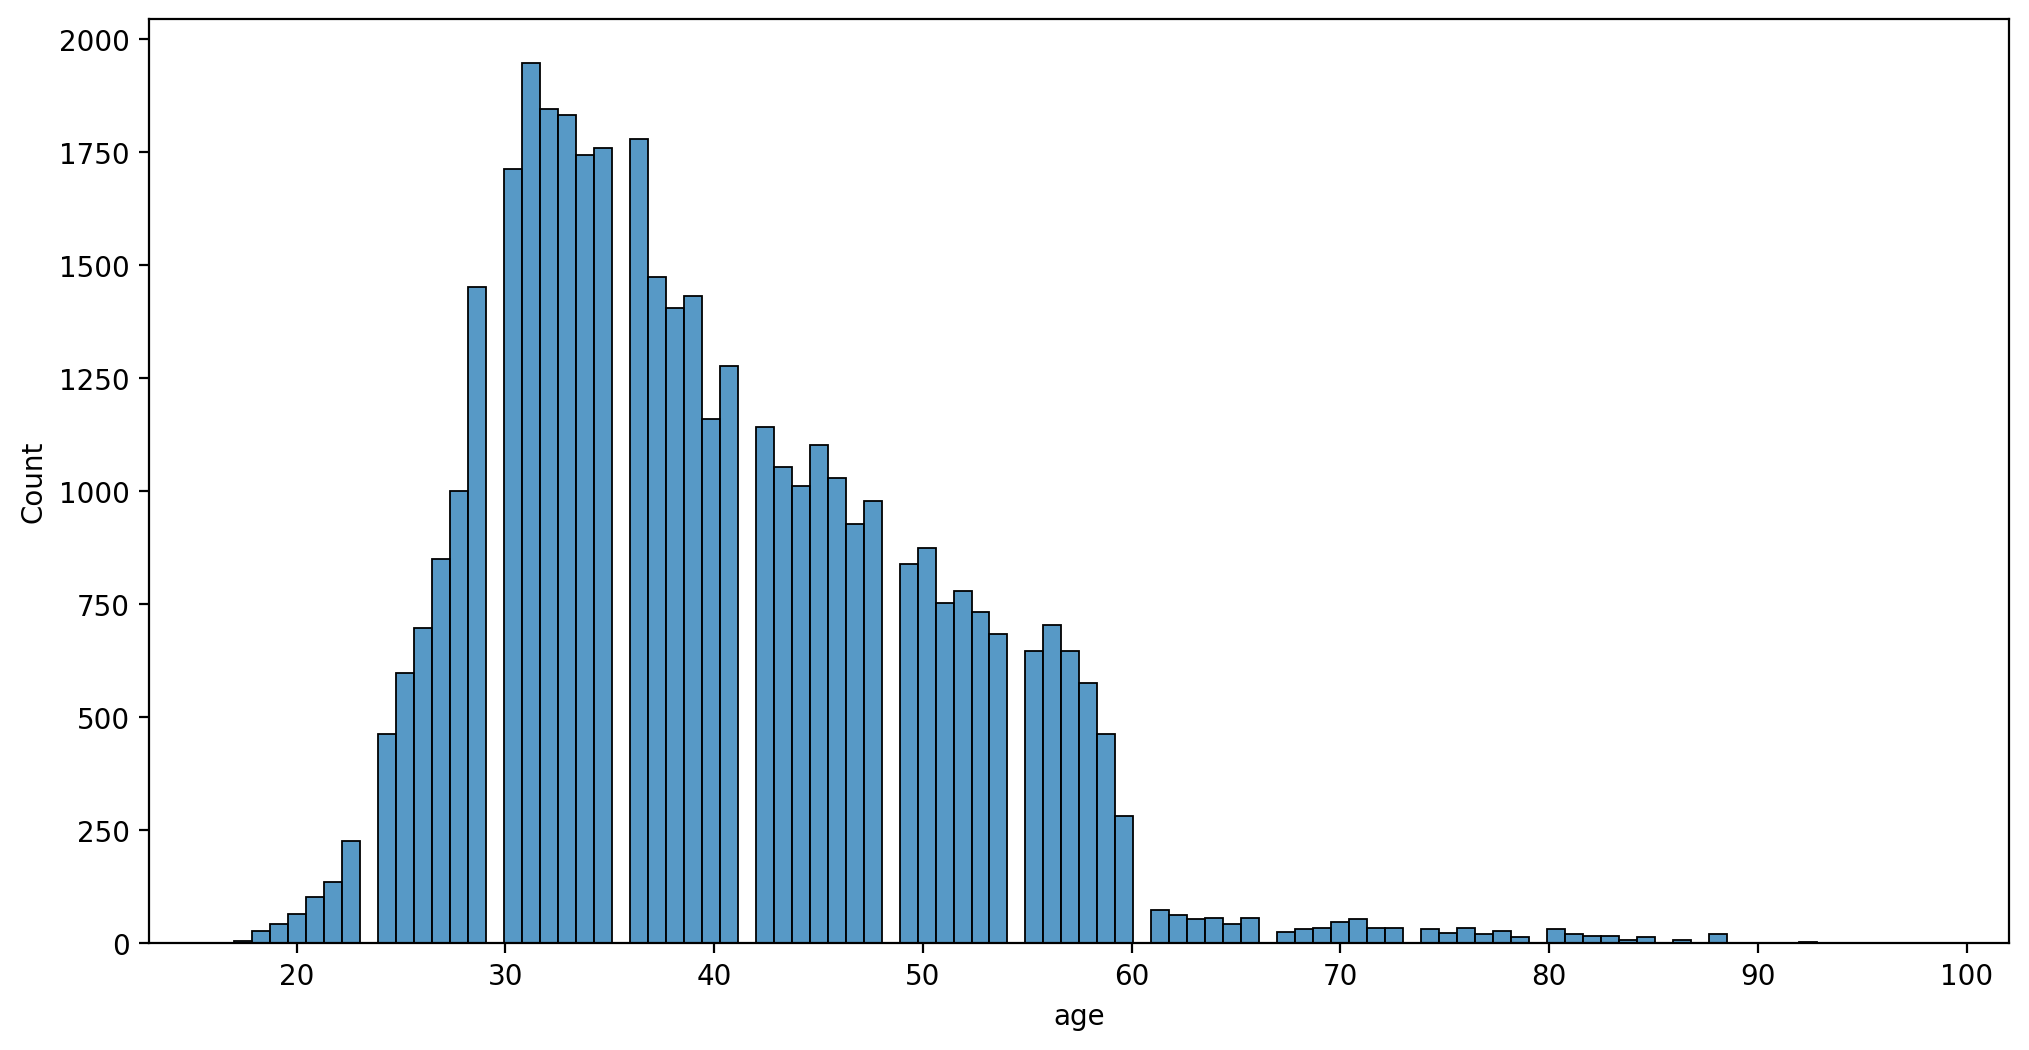

In [7]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age')

<Axes: xlabel='age', ylabel='Count'>

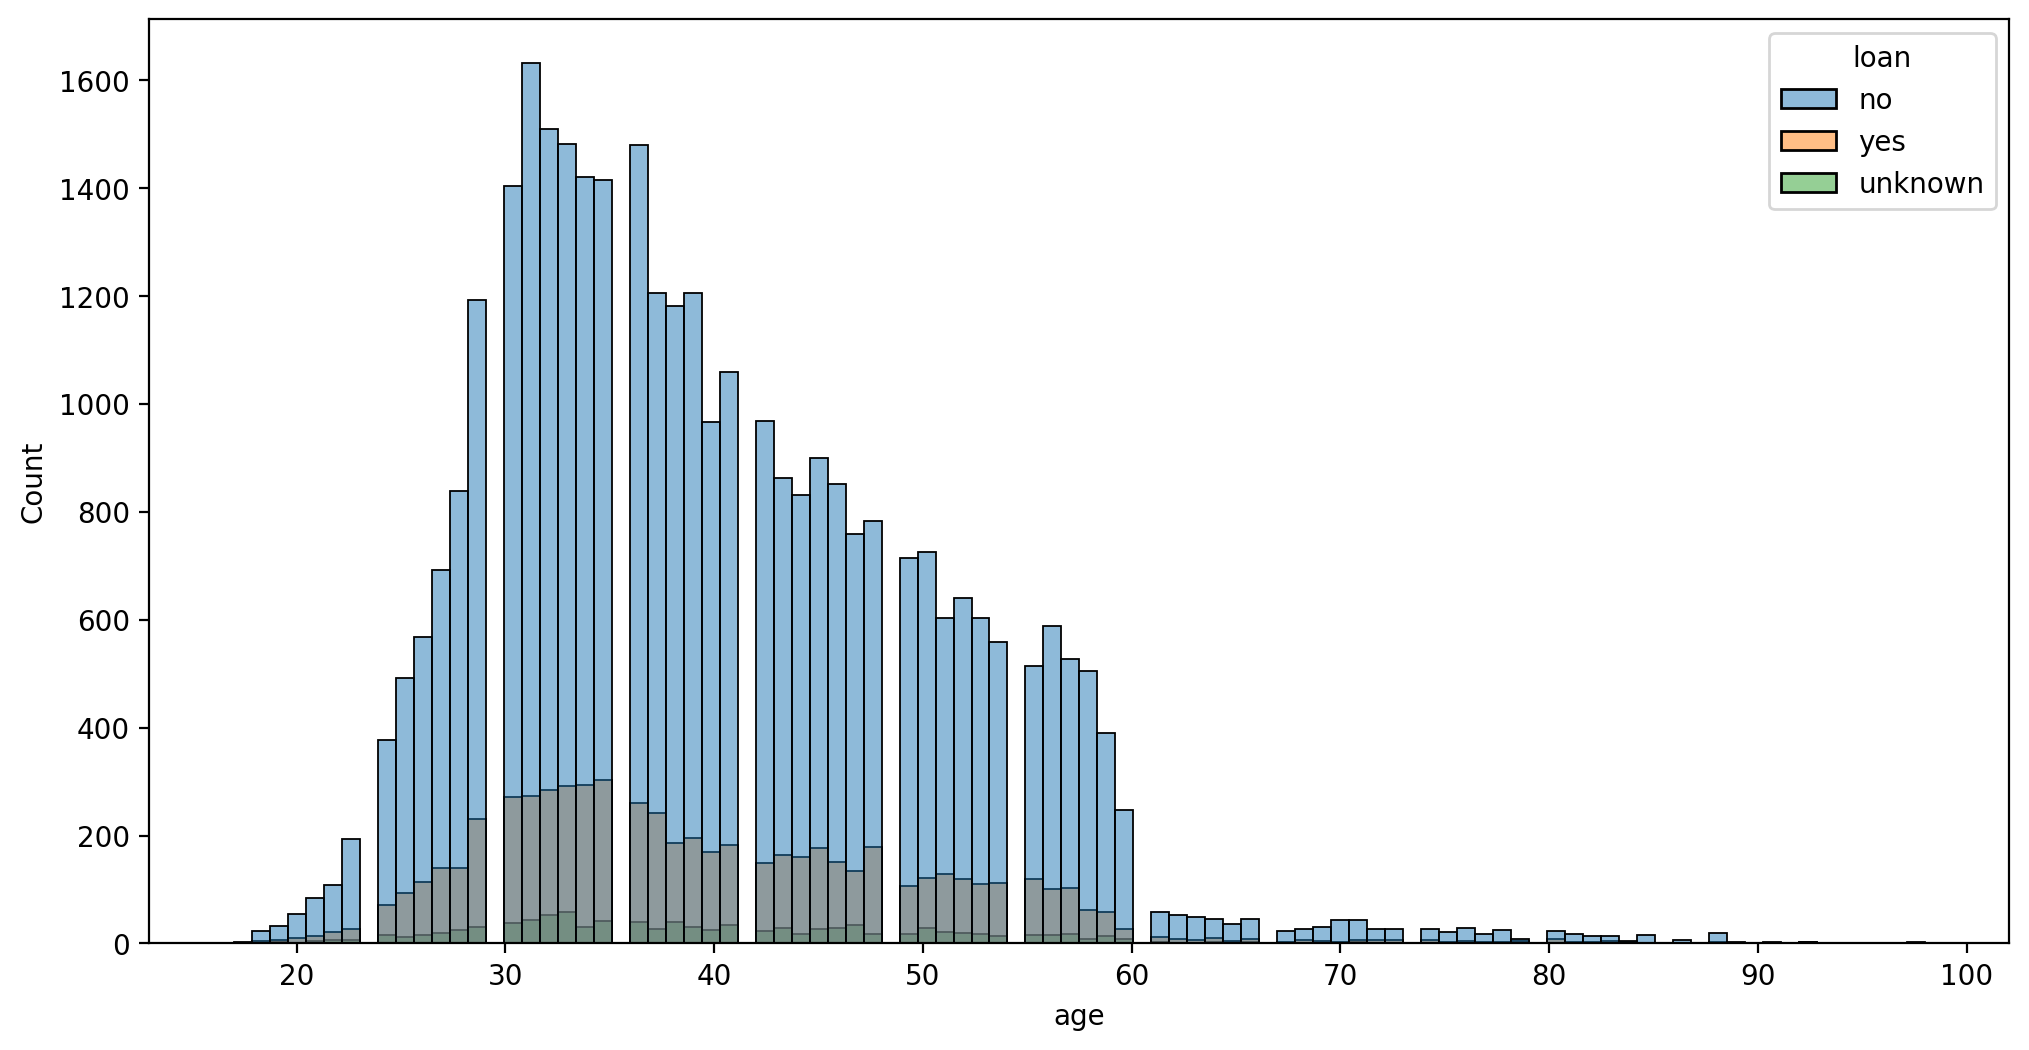

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

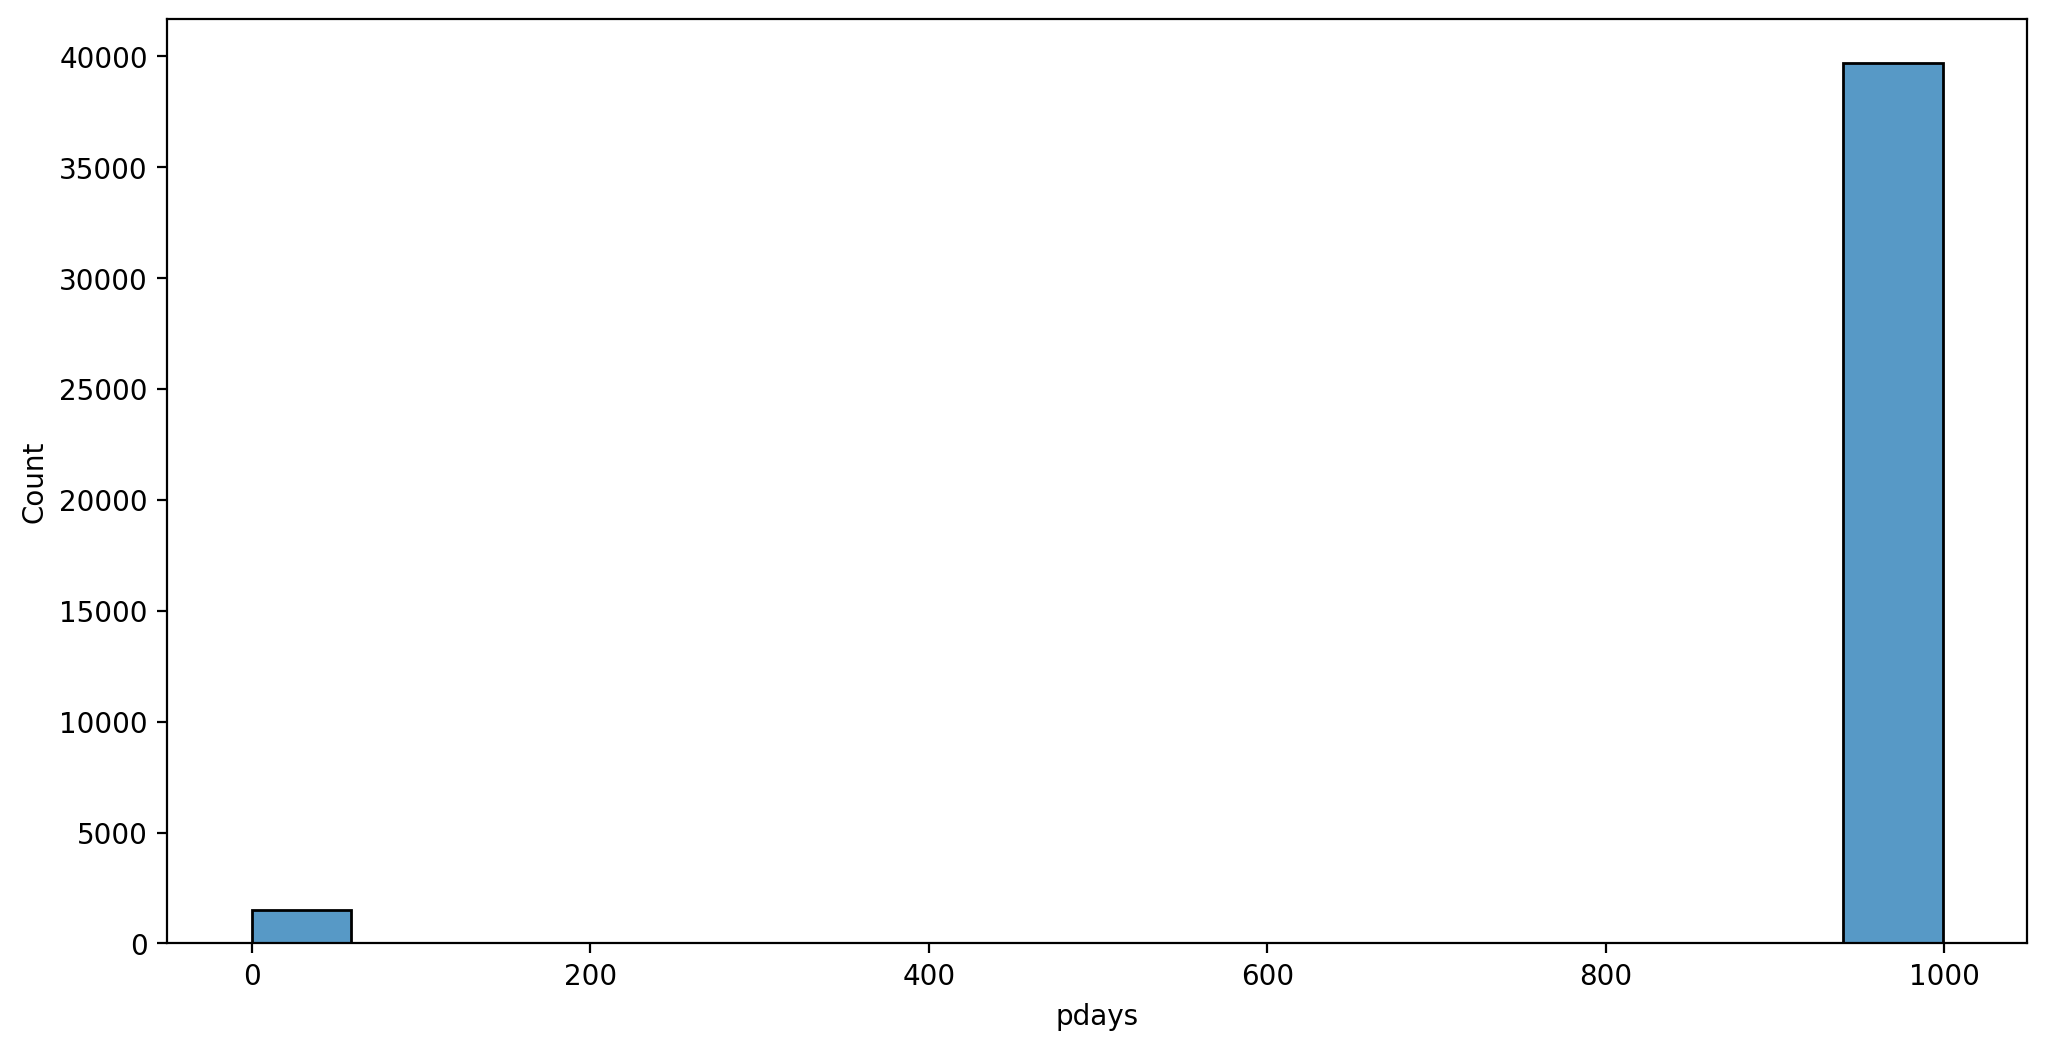

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

<Axes: xlabel='pdays', ylabel='Count'>

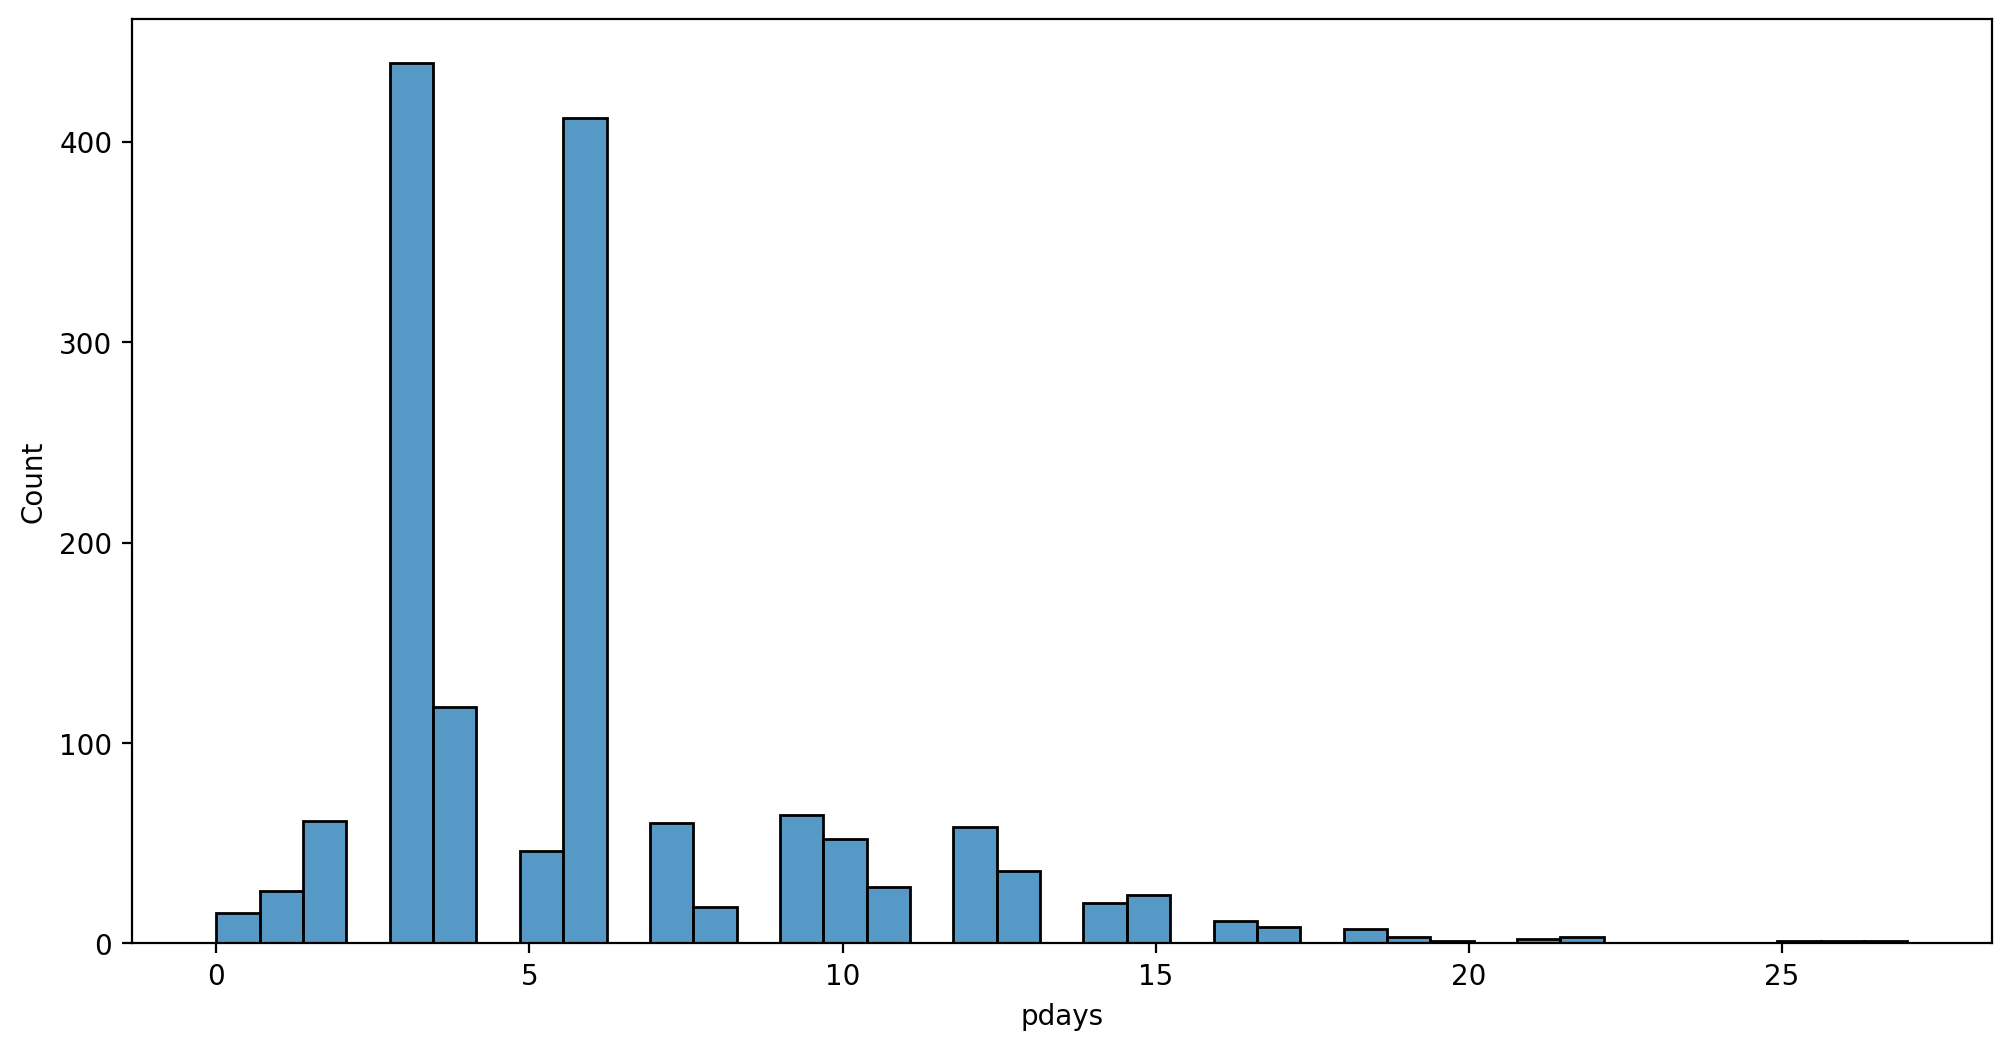

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**Bagaimana kontak dengan pelanggan dilakukan, berapa lama panggilan berlangsung?**

(0.0, 2000.0)

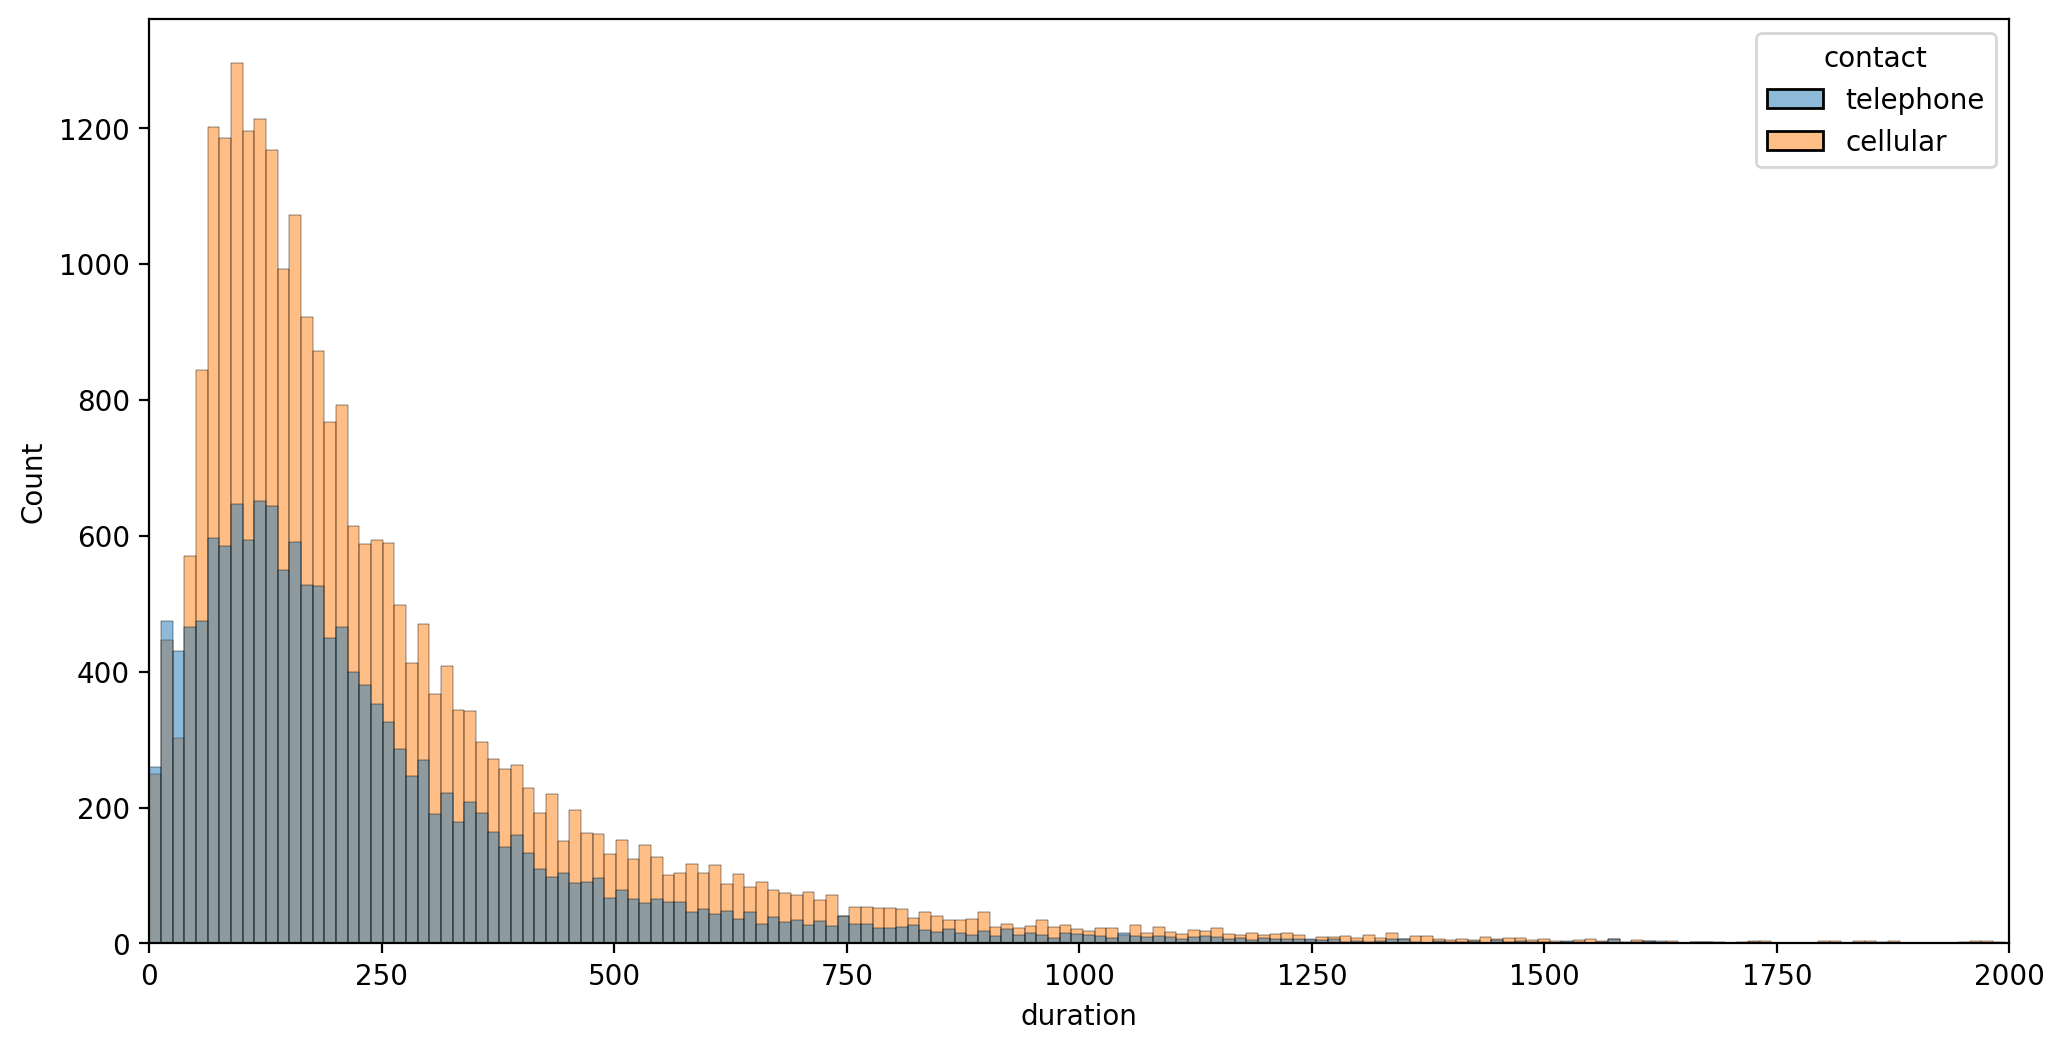

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

<Axes: xlabel='previous', ylabel='count'>

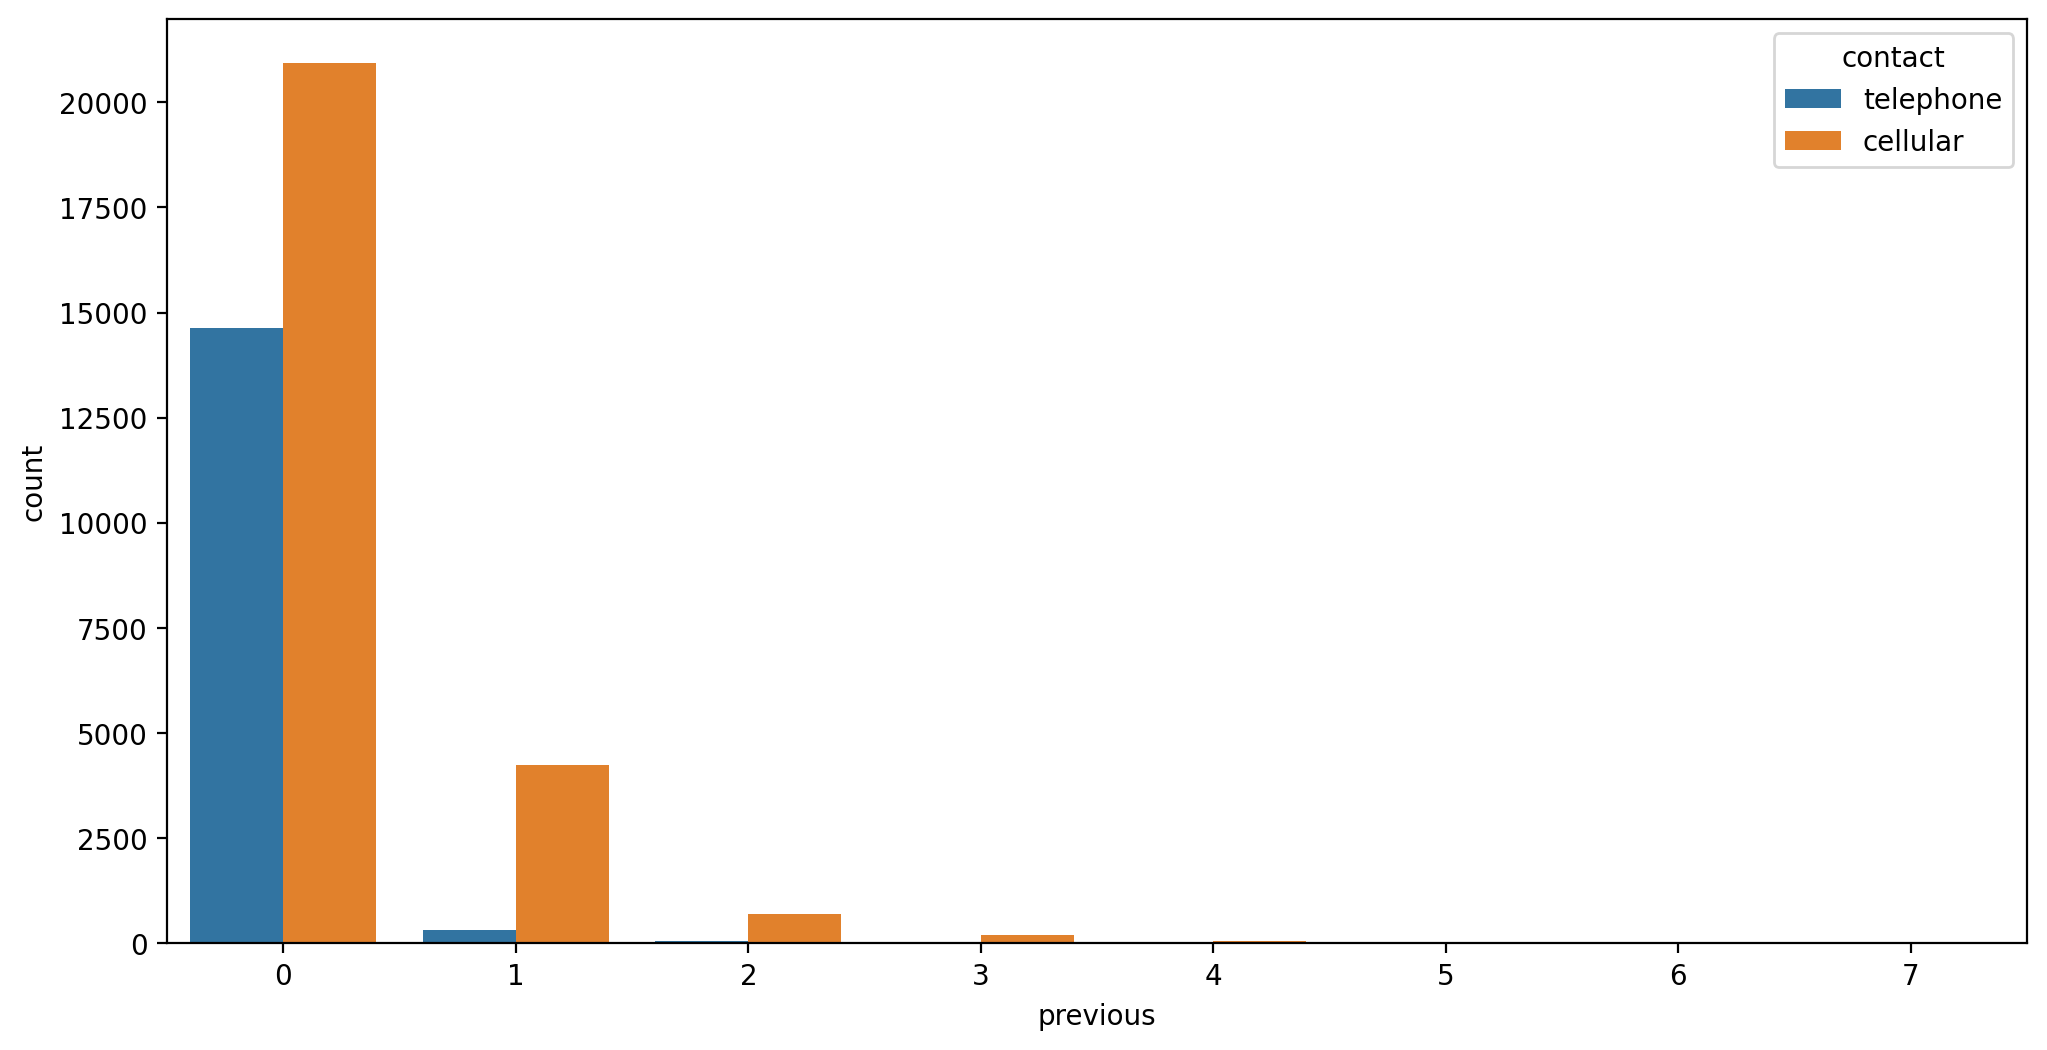

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

<Axes: xlabel='contact', ylabel='count'>

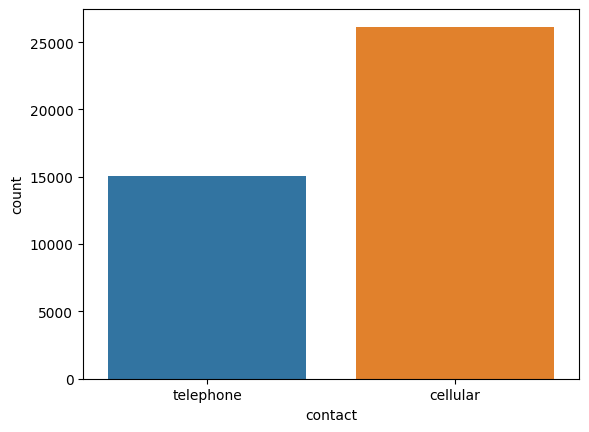

In [13]:
sns.countplot(data=df,x='contact')

### Categorical Features

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


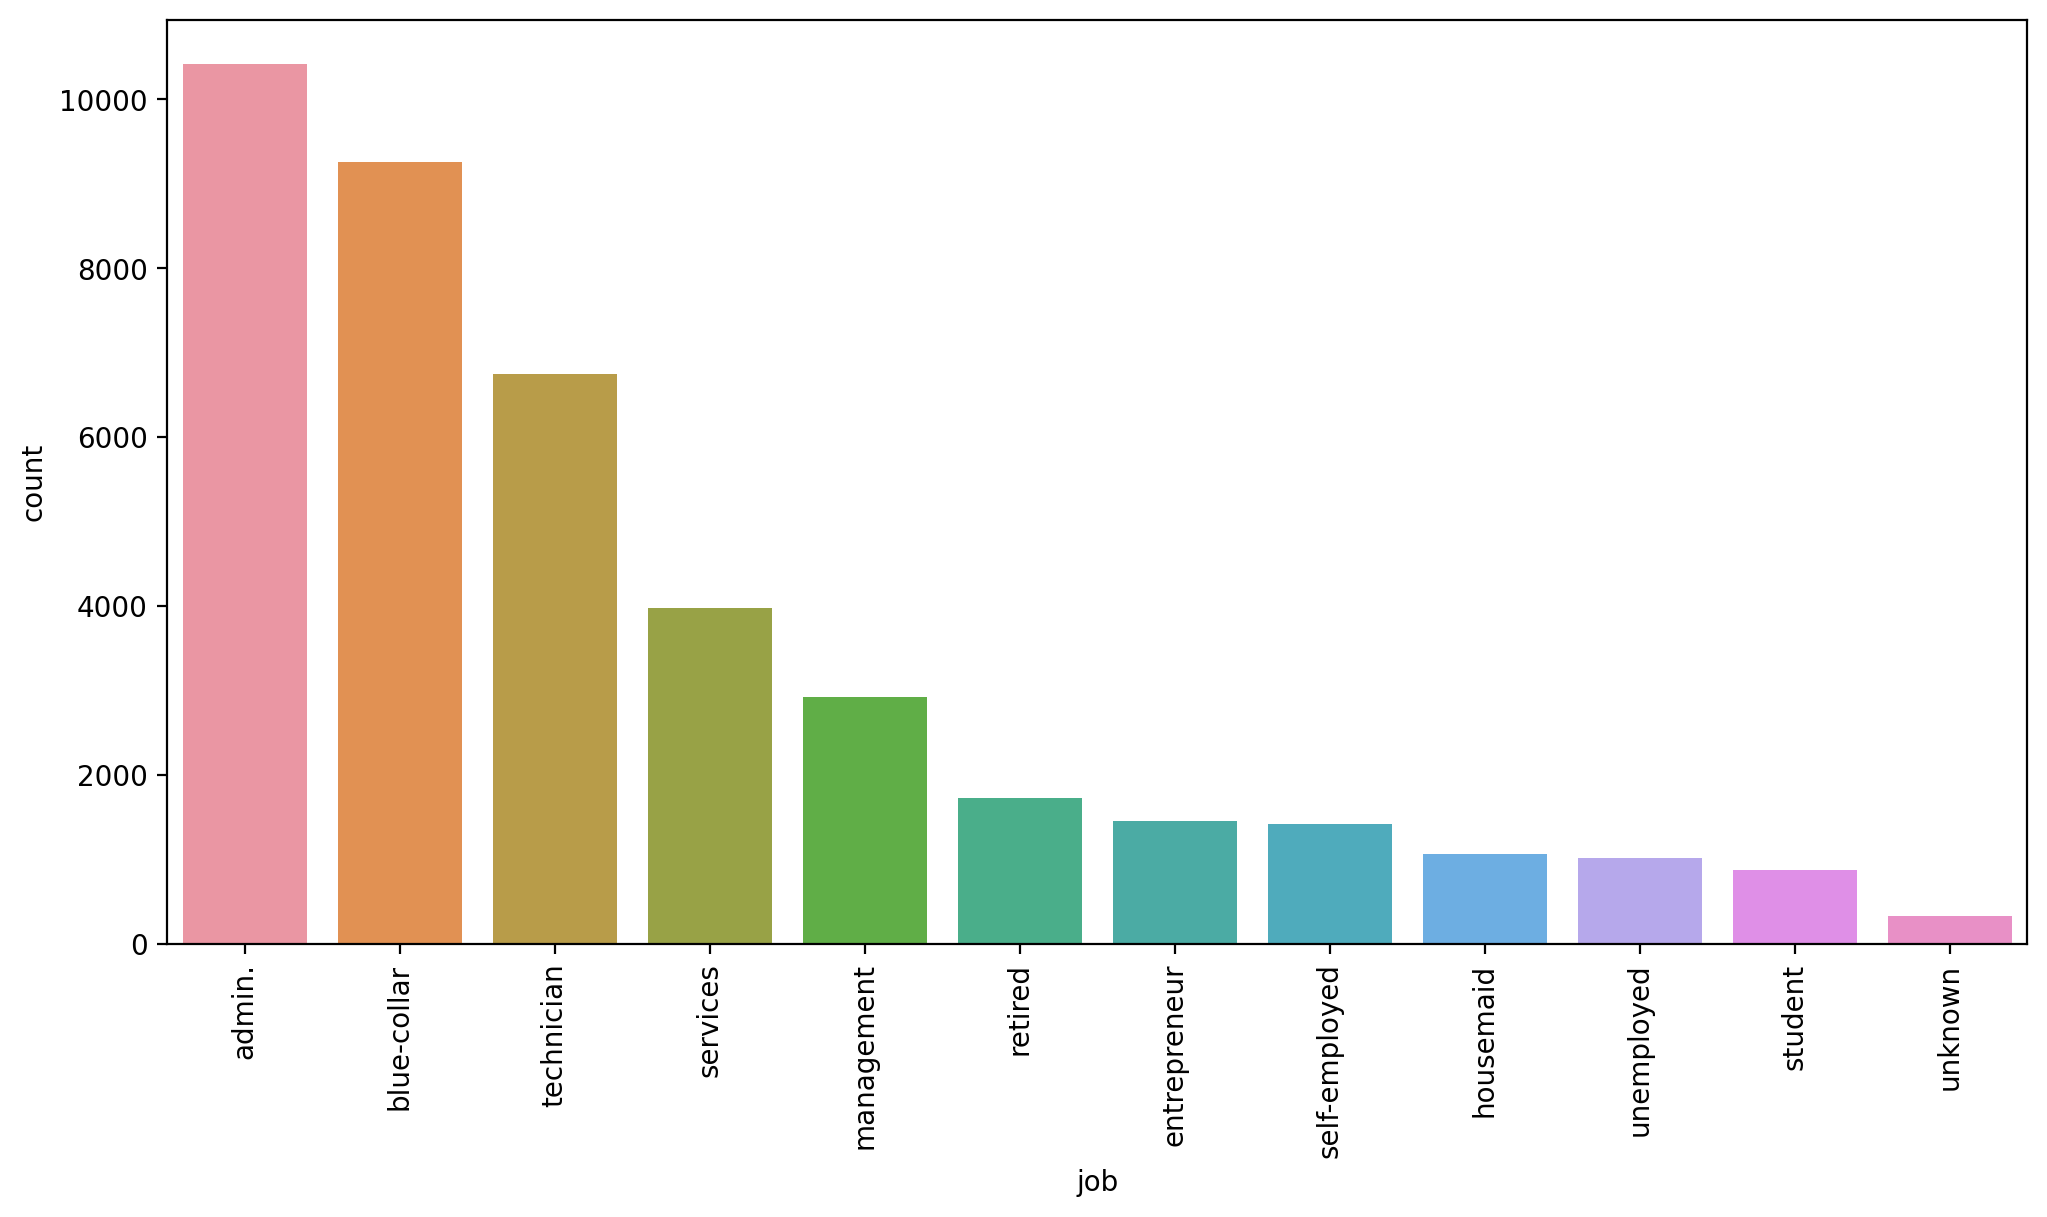

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

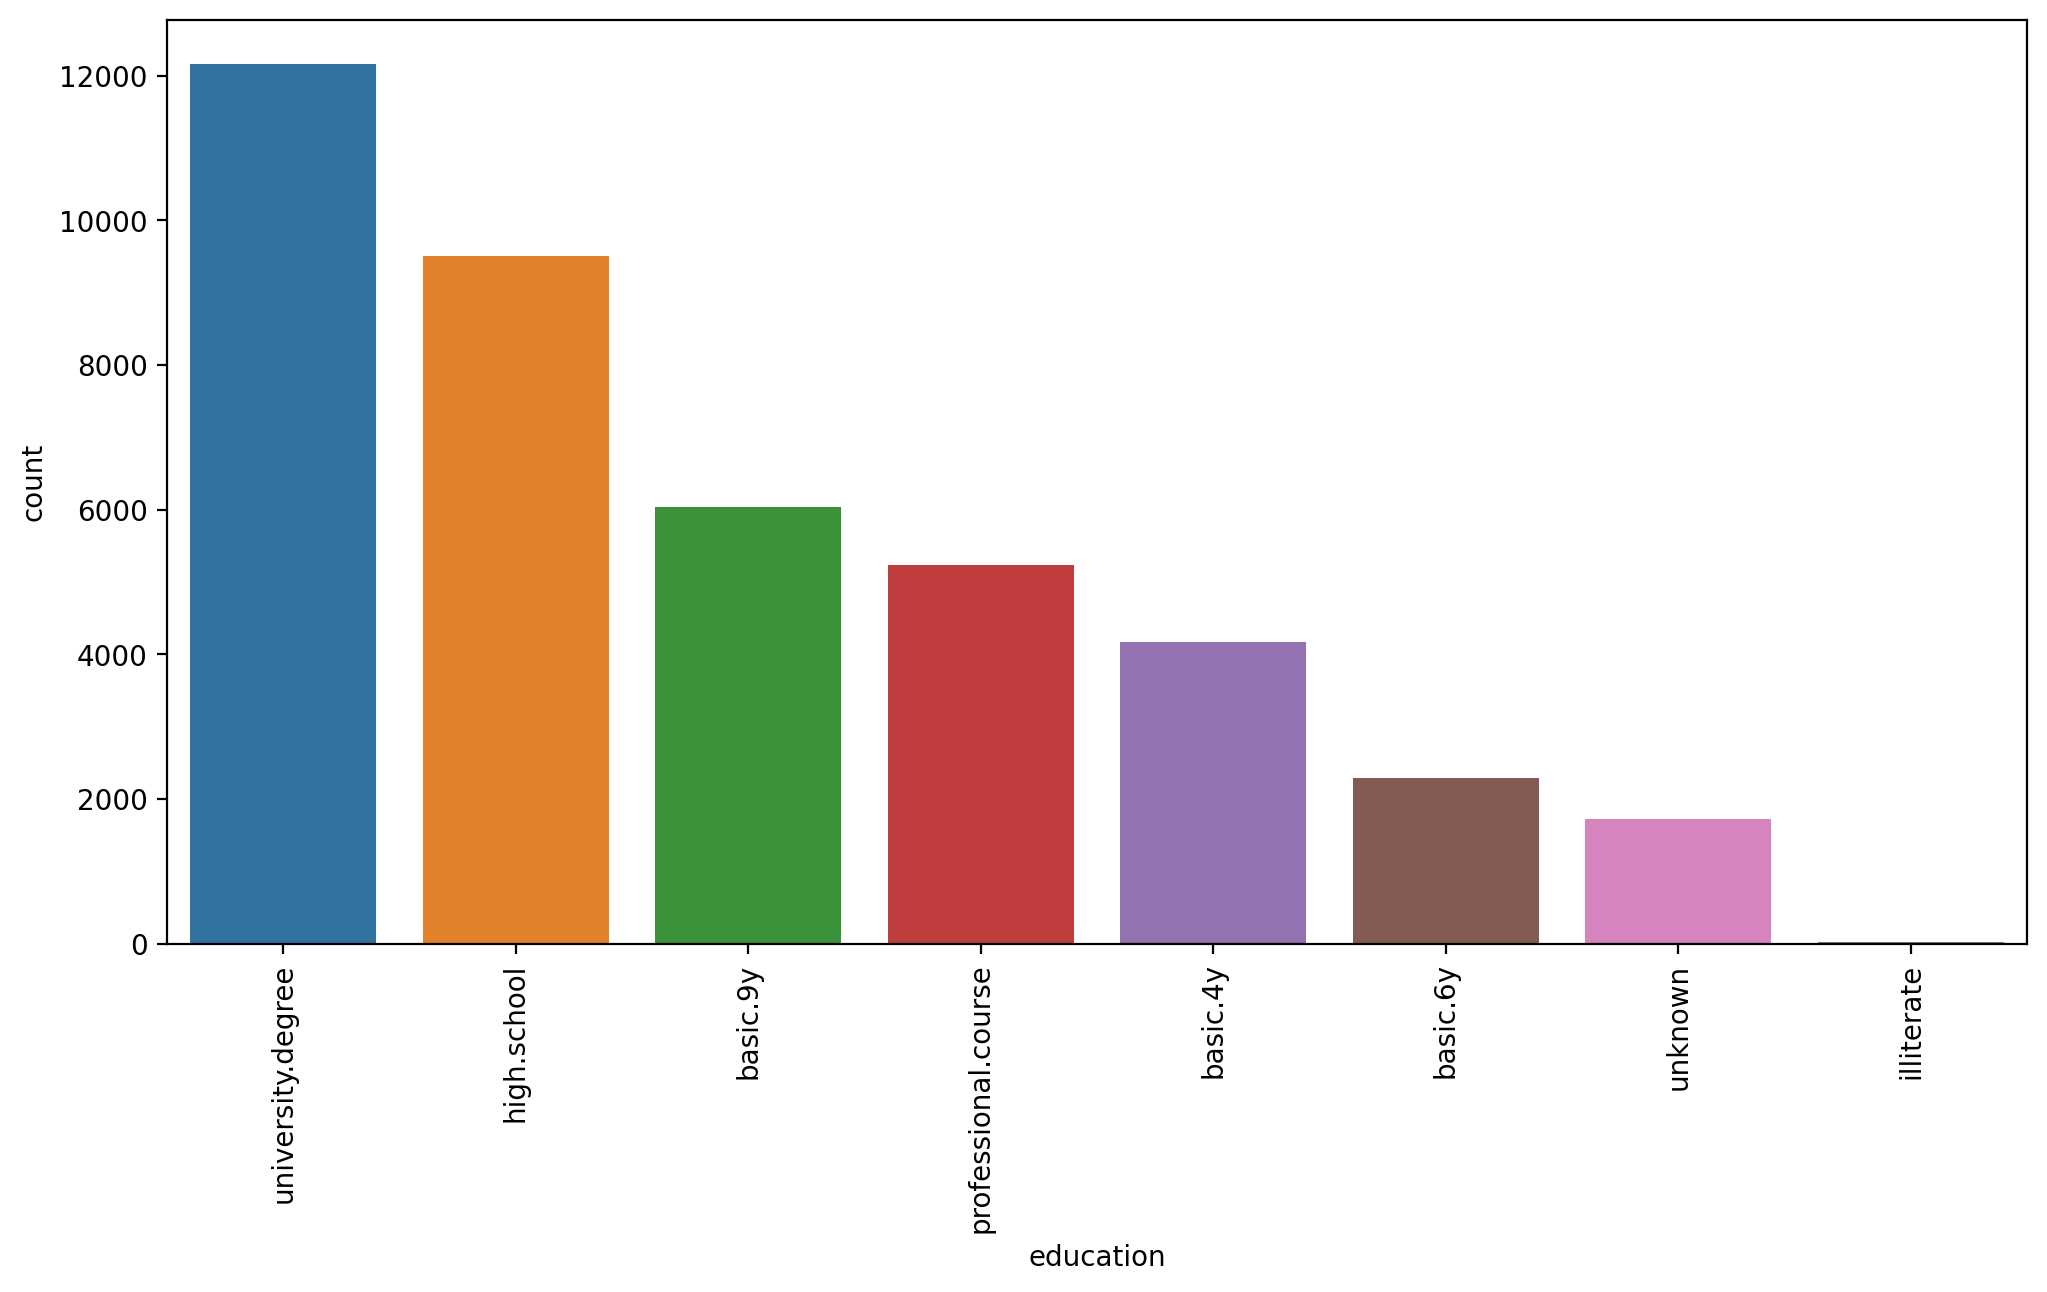

In [16]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

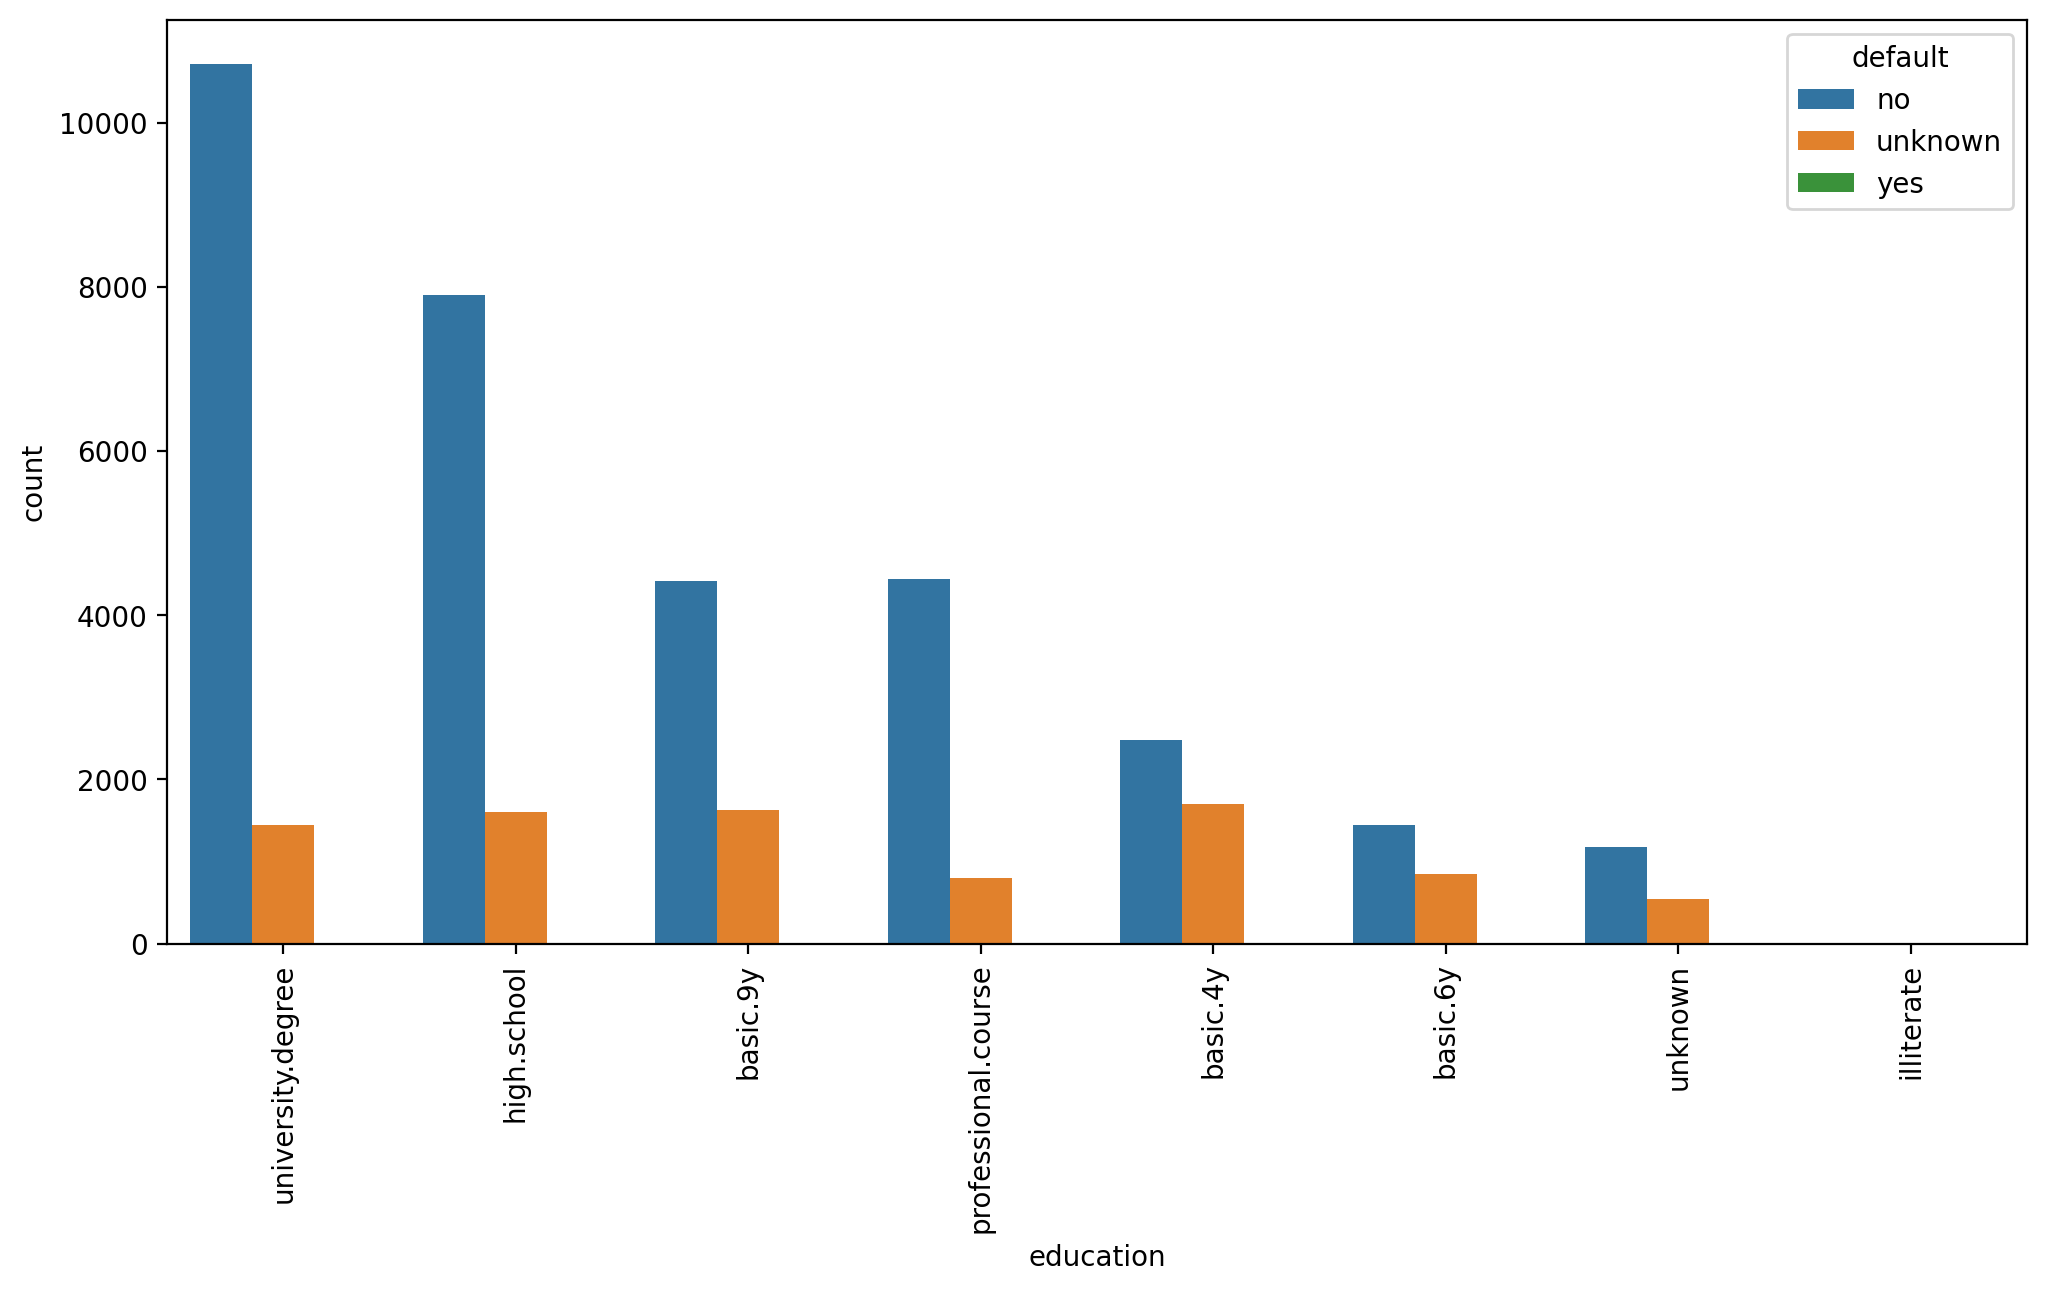

In [17]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<Axes: xlabel='default', ylabel='count'>

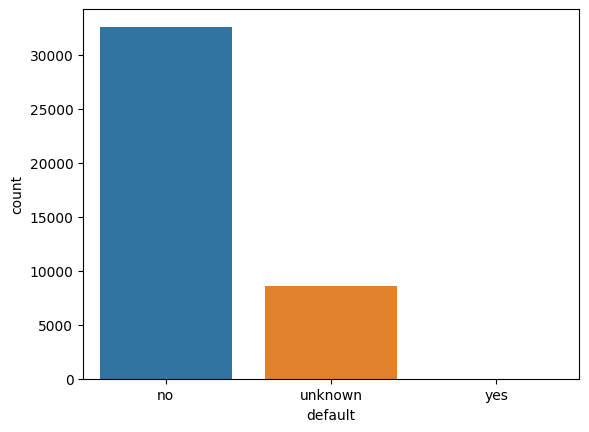

In [18]:
sns.countplot(data=df,x='default')

### Clustering

### Data Preparation

**UNSUPERVISED LEARNING: TIDAK MEMERLUKAN MEMBAGI DATA MENJADI TRAIN DAN TEST SPLIT!! TIDAK ADA LABEL UNTUK "UJI"!**

Namun diperlukannya mengubah fitur kategorikal menjadi fitur numerik yang masuk akal untuk dilakukan, serta menskalakan data karena jarak menjadi faktor kunci dalam clustering.

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
X = pd.get_dummies(df)

In [21]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=2)

In [27]:
cluster_labels = model.fit_predict(scaled_X)

In [28]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
len(scaled_X)

41188

In [30]:
len(cluster_labels)

41188

In [31]:
X['Cluster'] = cluster_labels

<Axes: >

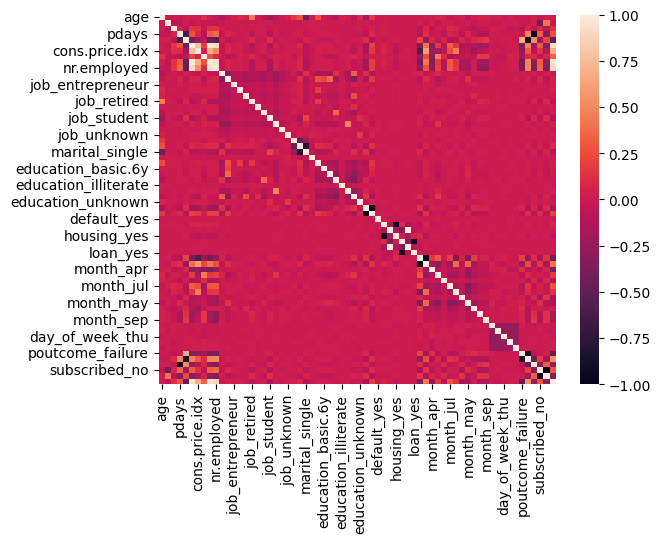

In [32]:
sns.heatmap(X.corr())

In [33]:
X.corr()['Cluster']

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [34]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

<Axes: >

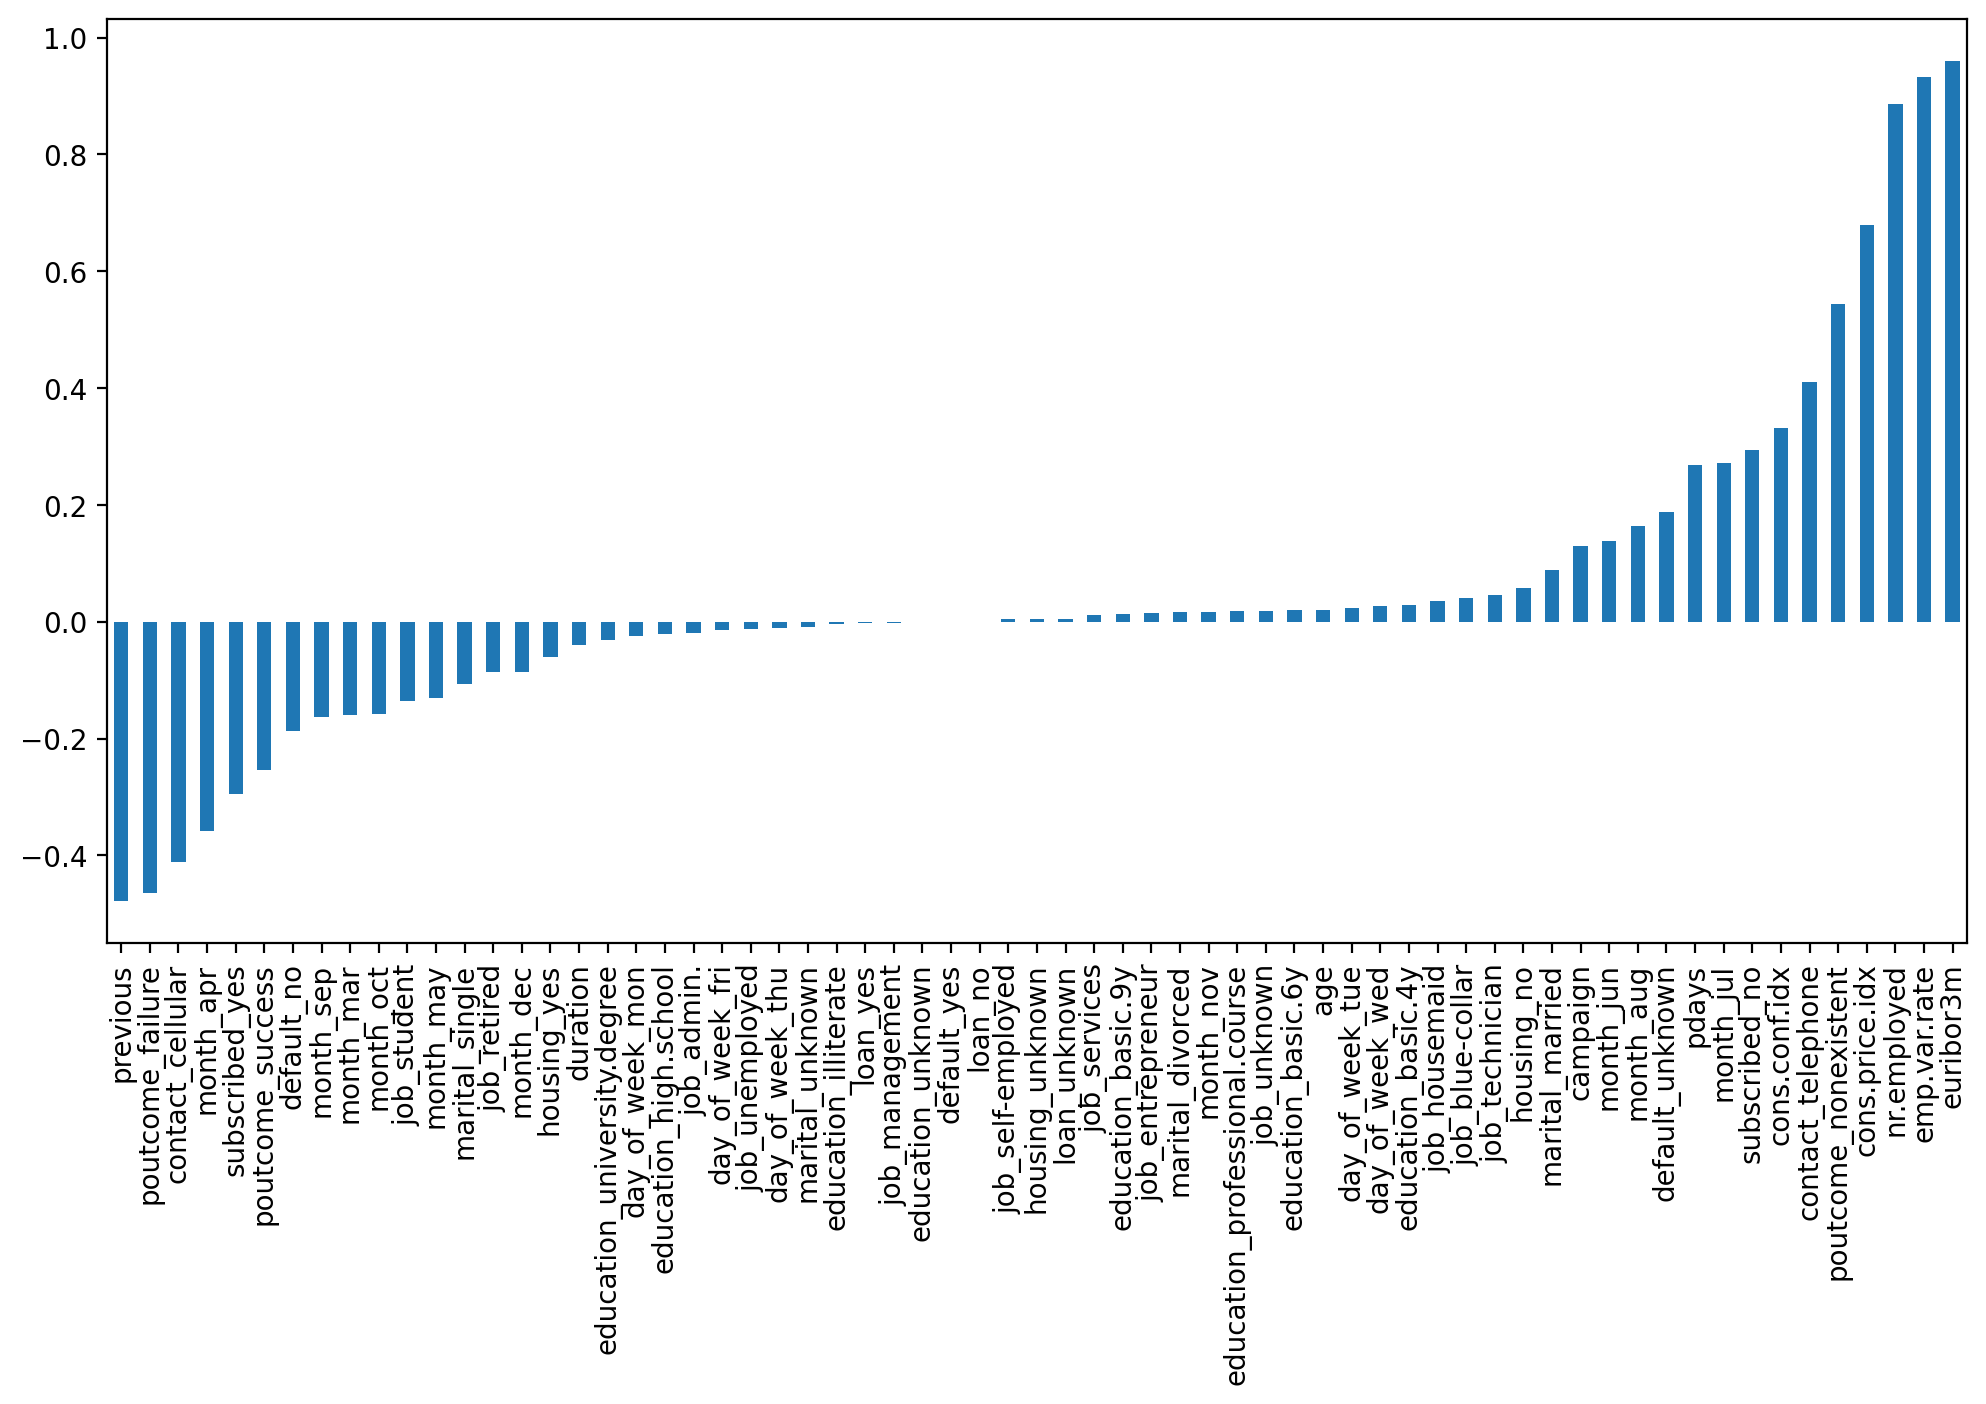

In [35]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')